In [63]:
import pandas as pd
import numpy as np
import statistics

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


for readME
-pip install basemap

In [64]:
TeslaJan = pd.read_csv("TeslaFi12023 (Jan sorted).csv")
TeslaJan

,data_id,Date,state,inside_tempF,driver_temp_settingF,outside_tempF
0,935094,1/1/2023 0:00,offline,NaN,NaN,NaN
1,935095,1/1/2023 0:01,offline,NaN,NaN,NaN
2,935096,1/1/2023 0:02,offline,NaN,NaN,NaN
3,935097,1/1/2023 0:03,offline,NaN,NaN,NaN
4,935098,1/1/2023 0:04,offline,NaN,NaN,NaN
...,...,...,...,...,...,...
45811,980905,1/31/2023 23:55,asleep,NaN,NaN,NaN
45812,980906,1/31/2023 23:56,asleep,NaN,NaN,NaN
45813,980907,1/31/2023 23:57,asleep,NaN,NaN,NaN
45814,980908,1/31/2023 23:58,asleep,NaN,NaN,NaN


In [65]:
TeslaFeb = pd.read_csv("TeslaFi22023 (Feb sorted).csv")
TeslaFeb

,data_id,Date,state,inside_tempF,driver_temp_settingF,outside_tempF
0,980910,2/1/2023 0:00,asleep,NaN,NaN,NaN
1,980911,2/1/2023 0:01,asleep,NaN,NaN,NaN
2,980912,2/1/2023 0:02,asleep,NaN,NaN,NaN
3,980913,2/1/2023 0:03,asleep,NaN,NaN,NaN
4,980914,2/1/2023 0:04,asleep,NaN,NaN,NaN
...,...,...,...,...,...,...
43003,1023913,2/28/2023 23:55,online,68,69,67
43004,1023914,2/28/2023 23:56,online,68,69,66
43005,1023915,2/28/2023 23:57,online,68,69,66
43006,1023916,2/28/2023 23:58,online,68,69,66


In [66]:
df1 = TeslaJan[TeslaJan["state"] == "online"]
df1

,data_id,Date,state,inside_tempF,driver_temp_settingF,outside_tempF
898,935992,1/1/2023 14:58,online,57.0,69.0,54.0
899,935993,1/1/2023 14:58,online,58.0,69.0,54.0
900,935994,1/1/2023 14:59,online,60.0,69.0,53.0
901,935995,1/1/2023 15:00,online,62.0,69.0,53.0
902,935996,1/1/2023 15:01,online,63.0,69.0,53.0
...,...,...,...,...,...,...
45752,980846,1/31/2023 22:56,online,48.0,69.0,41.0
45753,980847,1/31/2023 22:57,online,48.0,69.0,41.0
45754,980848,1/31/2023 22:58,online,48.0,69.0,43.0
45755,980849,1/31/2023 22:59,online,48.0,69.0,43.0


In [67]:
df2 = TeslaFeb[TeslaFeb["state"] == "online"]
df2

,data_id,Date,state,inside_tempF,driver_temp_settingF,outside_tempF
274,981184,2/1/2023 4:34,online,48,69,46
275,981185,2/1/2023 4:35,online,49,69,46
276,981186,2/1/2023 4:36,online,49,69,46
277,981187,2/1/2023 4:37,online,49,69,46
278,981188,2/1/2023 4:38,online,48,69,46
...,...,...,...,...,...,...
43003,1023913,2/28/2023 23:55,online,68,69,67
43004,1023914,2/28/2023 23:56,online,68,69,66
43005,1023915,2/28/2023 23:57,online,68,69,66
43006,1023916,2/28/2023 23:58,online,68,69,66


In [68]:
merged_df = pd.concat([df1, df2])
merged_df

,data_id,Date,state,inside_tempF,driver_temp_settingF,outside_tempF
898,935992,1/1/2023 14:58,online,57.0,69.0,54.0
899,935993,1/1/2023 14:58,online,58.0,69.0,54.0
900,935994,1/1/2023 14:59,online,60.0,69.0,53.0
901,935995,1/1/2023 15:00,online,62.0,69.0,53.0
902,935996,1/1/2023 15:01,online,63.0,69.0,53.0
...,...,...,...,...,...,...
43003,1023913,2/28/2023 23:55,online,68,69,67
43004,1023914,2/28/2023 23:56,online,68,69,66
43005,1023915,2/28/2023 23:57,online,68,69,66
43006,1023916,2/28/2023 23:58,online,68,69,66


In [69]:
merged_df['inside_tempF'] = pd.to_numeric(merged_df['inside_tempF'], errors='coerce')
mean_inside_tempF = merged_df['inside_tempF'].mean()
mean_inside_tempF

63.008082121789215

In [70]:
merged_df['outside_tempF'] = pd.to_numeric(merged_df['outside_tempF'], errors='coerce')
mean_outside_tempF = merged_df['outside_tempF'].mean()
mean_outside_tempF

51.114827201783726

In [128]:
TeslaMap = pd.read_csv(("TeslaFi12023.csv"), low_memory=False)
TeslaMap[TeslaMap["state"] == "online"]

,data_id,Date,calendar_enabled,remote_start_enabled,vehicle_id,display_name,color,backseat_token,notifications_enabled,vin,...,max_avail_temp,is_climate_on,right_temp_direction,min_avail_temp,rear_seat_type,power,steering_wheel_heater,wiper_blade_heater,side_mirror_heaters,elevation
898,935992,2023-01-01 14:58:30,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,1.0,193.0,15.0,1.0,2.0,0.0,0.0,0.0,258.6680
899,935993,2023-01-01 14:58:52,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,1.0,161.0,15.0,1.0,2.0,0.0,0.0,0.0,NaN
900,935994,2023-01-01 14:59:29,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,1.0,83.0,15.0,1.0,2.0,0.0,0.0,0.0,258.6608
901,935995,2023-01-01 15:00:31,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,197.0,15.0,1.0,0.0,0.0,0.0,0.0,NaN
902,935996,2023-01-01 15:01:37,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,1.0,172.0,15.0,1.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45752,980846,2023-01-31 22:56:25,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,738.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN
45753,980847,2023-01-31 22:57:25,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,738.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN
45754,980848,2023-01-31 22:58:26,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,738.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN
45755,980849,2023-01-31 22:59:28,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,738.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN


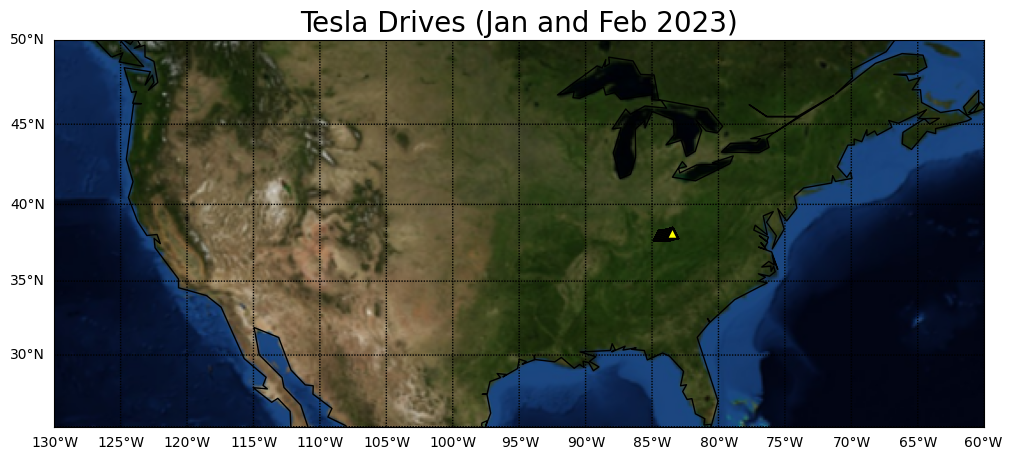

In [124]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 25,
           urcrnrlat = 50,
           llcrnrlon = -130,
           urcrnrlon = -60,
           resolution = 'c')
m.bluemarble(scale=0.5)

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,5),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1])

sites_lat_y = TeslaMap['latitude'].tolist()
sites_lon_x = TeslaMap['longitude'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=50, marker='^', c='yellow', alpha=1, edgecolor='k', linewidth=1, zorder=0)

plt.title('Tesla Drives (Jan and Feb 2023)', fontsize=20)

plt.show()

C:\Users\bmontgomery\AppData\Local\Temp\ipykernel_9924\1017340743.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'ok', markersize=5, color='white')
C:\Users\bmontgomery\AppData\Local\Temp\ipykernel_9924\1017340743.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'ok', markersize=5, color='white')


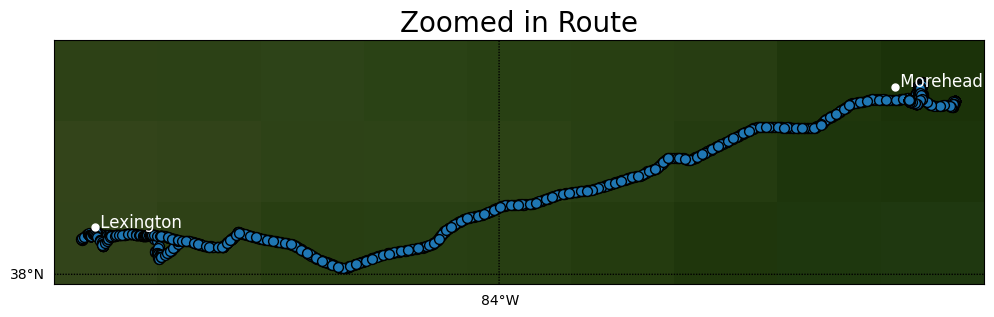

In [155]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 37.99,
           urcrnrlat = 38.25,
           llcrnrlon = -84.55,
           urcrnrlon = -83.4,
           resolution = 'c')
m.bluemarble(scale=0.5)
#m.etopo(scale=0.5, alpha=0.5)

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,1),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,1),labels=[0,0,0,1])

sites_lat_y = TeslaMap['latitude'].tolist()
sites_lon_x = TeslaMap['longitude'].tolist()

#colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=50, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)
#m.scatter(sotes_lat_y=True, s=5000, c='blue', marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=1)

x, y = m(-83.51, 38.2)
plt.plot(x, y, 'ok', markersize=5, color='white')
plt.text(x, y, ' Morehead', fontsize=12, color='white');

x, y = m(-84.5, 38.05)
plt.plot(x, y, 'ok', markersize=5, color='white')
plt.text(x, y, ' Lexington', fontsize=12, color='white');

plt.title('Zoomed in Route', fontsize=20)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


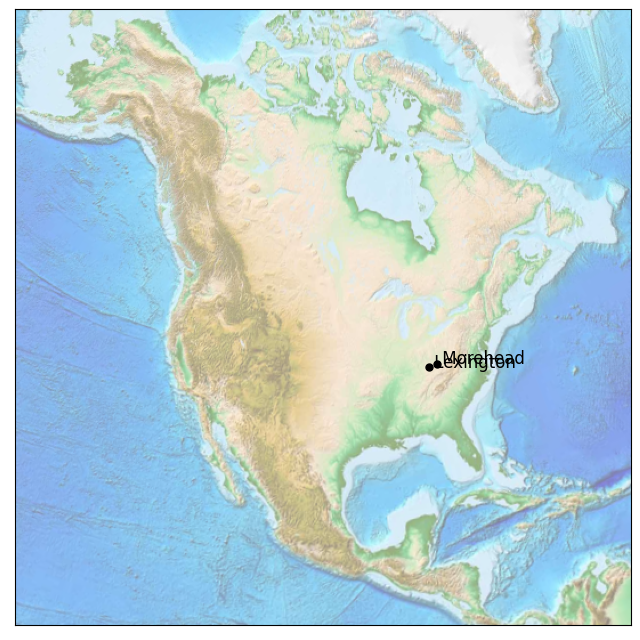

In [131]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-83.1, 38.2)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Morehead', fontsize=12);

x, y = m(-84.3, 38.01)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Lexington', fontsize=12);



In [73]:
#merged_df.plot(x="outside_tempF", y="Date", kind="scatter", xlabel="Outside Temperature (F)") 